In [212]:
from vega_datasets import data
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


# Use the above dataset for the following exercises:

## Resample by the day and take the average temperature. Visualize the average temperature over time.

In [13]:
# Since .resampling can only be done wotha. data frame that has date_time as an index:

# First, we set date column equal to the datetime.

df['date'] = pd.to_datetime(df.date)

In [14]:
# then we set index equal to the date column then we sort the index in chronological order
df=df.set_index('date').sort_index()

In [15]:
# Here we resample base off date and resampling 
df.resample('d').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


## Write the code necessary to visualize the minimum temperature over time.

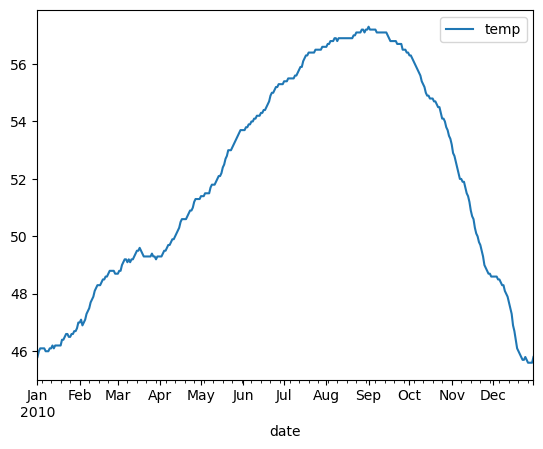

In [23]:
df.resample('d').min().plot()
plt.show()

## Write the code necessary to visualize the maximum temperature over time.

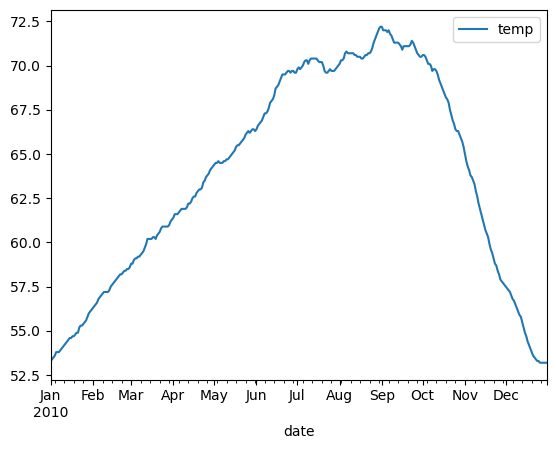

In [24]:
df.resample('d').max().plot()
plt.show()

## Which month is the coldest, on average?

In [118]:
# First we made a new column named month 
df['month'] = df.index.month_name()

# Here we used a groupby month aggon the mean or average tempture by month then we sorted the values based on temp
# Then we set ascending to True so we can get a data frame of months witht he coldest being on top, the we saved it to a new variable
colest_months_by_avg = df.resample('M').mean().sort_values(by=['temp'], ascending=True)

In [1]:
# Trust but verify our code 
colest_months_by_average

NameError: name 'colest_months_by_average' is not defined

In [77]:
# Here we used a groupby month aggon the mean or average tempture by month then we sorted the values based on temp
# Then we set ascending to false so we can get a data frame of months witht he hottest being on top, the we saved it to a new variable
hottest_months_by_avg = df.groupby('month').mean().sort_values(by=['temp'], ascending=False)
hottest_months_by_avg

,temp
month,
September,62.487083
August,62.405376
July,61.765457
June,60.444722
October,60.253091
May,57.970968
April,55.633056
November,55.185139
March,53.956528


## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])).Use this resampled dataframe to calculate the change in temperature for the day.Which month has the highest daily temperature variability?

In [79]:
df['day'] = df.index.day_name()

In [87]:
min_max_df = df.resample('D').temp.agg(['min','max'])

In [90]:
min_max_df['change_in_temp'] = (min_max_df['max'] - min_max_df['min'])

In [91]:
min_max_df

,min,max,change_in_temp
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


## Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

# seatle database

In [93]:
data = data.seattle_weather()

# Use the above dataset for the following exercises:

In [ ]:
# First convert our date column to date time so we can effectivly use it 
data['date'] = pd.to_datetime(data.date)

# Then we will set the date column the index

data = data.set_index('date').sort_index()

## Which year and month combination has the highest amount of precipitation?

In [156]:
max_data = data.resample('M').sum().sort_values(by='precipitation',ascending=False)



In [157]:
max_data.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6
2014-03-31,240.0,400.1,168.2,114.0
2015-11-30,212.6,290.5,104.4,106.4
2012-11-30,210.5,339.8,156.8,96.6
2012-03-31,183.0,296.2,88.0,131.7


## Visualize the amount of monthly precipitation over time.

<Axes: xlabel='date'>

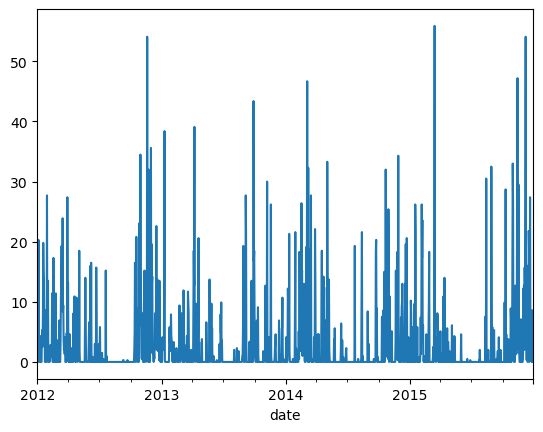

In [159]:
data.precipitation.plot()

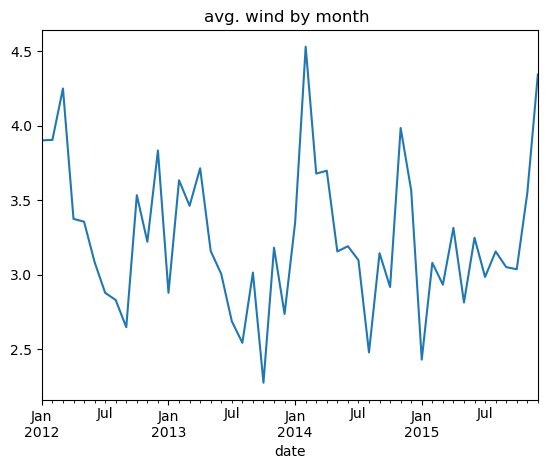

In [170]:
## Visualize the amount of wind over time. Choose a time interval you think is appropriate.
(data.resample('M').mean()).wind.plot()
plt.title('avg. wind by month ')
plt.show()

In [172]:
## Which year-month combination is the windiest?
(data.resample('M').sum().sort_values(by='wind')).head()

,precipitation,temp_max,temp_min,wind
date,,,,
2013-10-31,39.2,441.1,236.8,70.5
2015-01-31,93.0,314.8,134.9,75.3
2014-08-31,46.0,817.9,461.7,76.8
2013-08-31,34.4,809.7,479.9,78.8
2012-09-30,0.9,686.4,337.3,79.4


## What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [180]:
# First, we make a new column name is_sun and set it equal to the a bool value so we can aggergate with
data['is_sun'] = data.weather == 'sun'

In [184]:
# then we resample by year and now that we have sunshine in a quanitive state we can the calculate the sunniest year seatle had (2014)
data.resample('Y').sum().sort_values(by='is_sun',ascending=False)

,precipitation,temp_max,temp_min,wind,is_sun
date,,,,,
2014-12-31,1232.8,6203.5,3161.8,1236.5,211
2013-12-31,828.0,5861.5,2976.2,1100.8,205
2015-12-31,1139.2,6361.2,3225.0,1153.3,180
2012-12-31,1226.0,5591.3,2668.0,1244.7,118


## In which month does it rain the most?

In [197]:
data['is_rain'] = data.weather == 'rain'

In [198]:
data.resample('M').sum().sort_values(by='is_rain', ascending =False).head()

,precipitation,temp_max,temp_min,wind,is_sun,is_rain
date,,,,,,
2012-11-30,210.5,339.8,156.8,96.6,2,25
2012-12-31,174.0,224.3,102.1,118.8,1,23
2013-02-28,40.3,265.1,121.1,101.7,2,23
2012-03-31,183.0,296.2,88.0,131.7,6,19
2012-04-30,68.1,446.2,179.8,101.2,8,19


In [205]:
## Which month has the most number of days with a non-zero amount of precipitation?
data['no_rain_days'] = data.is_rain == 0

In [207]:
data.drop(columns='no_rain', inplace=True)

In [210]:
# here is a list of the dries months 
data.resample('M').sum().sort_values(by='no_rain_days', ascending=False).head()

,precipitation,temp_max,temp_min,wind,is_sun,is_rain,no_rain_days
date,,,,,,,
2014-01-31,94.0,297.6,127.0,103.8,20,0,31
2013-05-31,60.5,608.4,307.6,97.9,21,0,31
2015-07-31,2.3,870.9,480.5,92.5,25,0,31
2015-05-31,14.8,620.8,314.0,87.2,23,0,31
2015-03-31,113.5,445.7,192.0,90.9,16,0,31


    End 

In [213]:
x = data.flights_20k()


In [214]:
x.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


# Use the above dataset for the following exercises:

## Convert any negative delays to 0.

In [227]:
x['date'] = pd.to_datetime(x.date)

In [228]:
x = x.set_index('date').sort_index()

## Which hour of the day has the highest average delay?

## Does the day of the week make a difference in the delay amount?

## Does the month make a difference in the delay amount?